In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.script import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.distributed import *
from fastprogress import fastprogress
from torchvision.models import *

In [3]:
tfms = get_transforms(do_flip=True,flip_vert=False,max_rotate=10.0,max_zoom=1.1,max_lighting=0.2,max_warp=0.2,p_affine=0.75,p_lighting=0.75)


In [4]:
tfms[1]

[RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)]

In [5]:
np.random.seed(42)


In [6]:
# from pathlib import Path
# path = Path("test/")

# print(path)
# verify_images(path, delete=True)

In [7]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1., gamma=1.):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets, **kwargs):
        CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-CE_loss)
        F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
        return F_loss.mean()

In [8]:
loss_func = FocalLoss(gamma=2.)

In [9]:
src = (ImageList.from_folder(path='train').split_by_rand_pct(0.2).label_from_folder())

In [10]:
src.add_test_folder('C:\\contests\\snakes-breed\\test')

LabelLists;

Train: LabelList (65934 items)
x: ImageList
Image (3, 500, 375),Image (3, 500, 375),Image (3, 500, 375),Image (3, 500, 375),Image (3, 375, 500)
y: CategoryList
class-1059,class-1059,class-1059,class-1059,class-1059
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 533, 800),Image (3, 375, 500),Image (3, 2000, 1500),Image (3, 480, 358),Image (3, 500, 375)
y: CategoryList
class-448,class-697,class-204,class-540,class-854
Path: train;

Test: LabelList (17686 items)
x: ImageList
Image (3, 2000, 1500),Image (3, 406, 500),Image (3, 500, 500),Image (3, 1500, 2000),Image (3, 533, 800)
y: EmptyLabelList
,,,,
Path: train

In [11]:
data = src.transform(tfms,size=256).databunch(bs=24).normalize()

In [12]:
data.c

45

In [13]:
data

ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
class-1059,class-1059,class-1059,class-1059,class-1059
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
class-448,class-697,class-204,class-540,class-854
Path: train;

Test: LabelList (17686 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: train

In [14]:
data.test_ds.items[0]

WindowsPath('C:/contests/snakes-breed/test/00046ff8b04d6fe7f9c5a9d8dca33561.jpg')

In [15]:
alpha=0.99
mom=0.9
eps=1e-6
opt_func = partial(optim.Adam, betas=(mom,alpha), eps=eps)

In [16]:
learn = cnn_learner(data, models.densenet121,pretrained=False, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')],loss_func = loss_func,opt_func=opt_func,wd=1e-2)

In [17]:
learn.unfreeze()

In [18]:
learn= learn.mixup(alpha=0.2)

In [19]:
learn.bn_wd=False

In [20]:
learn.true_wd=True

In [21]:
learn.load('dn121-with-focal-loss')

D:\toolkits.win\conda\envs\snakes_breed\lib\site-packages\torch\serialization.py:250: UserWarning: Couldn't retrieve source code for container of type FocalLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Learner(data=ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
class-1059,class-1059,class-1059,class-1059,class-1059
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
class-448,class-697,class-204,class-540,class-854
Path: train;

Test: LabelList (17686 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: train, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dil

In [22]:
img = open_image(data.test_ds.items[5])

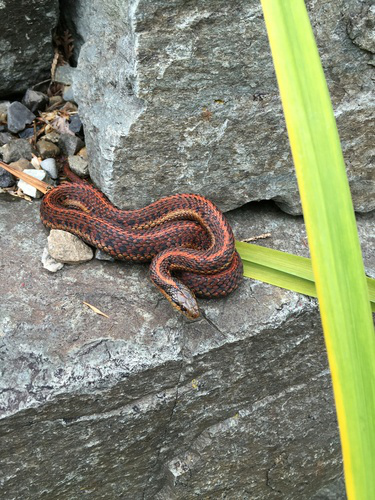

In [23]:
img

In [24]:
img.shape

torch.Size([3, 500, 375])

In [25]:
a,b,c,d=learn.predict(img,return_x=True)

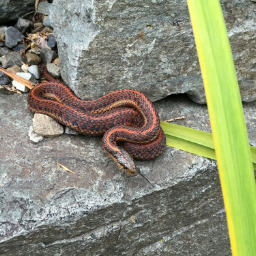

In [26]:
a

In [ ]:
tfms[1]

In [ ]:
img_new = img.apply_tfms(tfms[1],size=256)

In [ ]:
img_new

In [ ]:
img_new.shape

In [ ]:
learn.predict(img_new)

In [ ]:
preds,output=learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
probs = np.exp(preds) / np.exp(preds).sum(1)[:,None]

In [ ]:
probs[0]

In [ ]:
df_test = pd.read_csv('test_file.csv',low_memory=False)

In [ ]:
df_test.head()

In [ ]:
data.classes[np.argmax(probs[0])]

In [ ]:
df_classes = pd.read_csv('class.csv',low_memory=False)

In [ ]:
df_classes.head()

In [ ]:
data_dict = df_classes.set_index('class_idx')['original_class'].to_dict()

In [ ]:
data_dict

In [ ]:
data.test_ds.items

In [ ]:
print(os.path.basename(data.test_ds.items[0]))

In [ ]:
df_test.head()

In [ ]:
probs_np = probs.numpy()

In [ ]:
i = 0
for test_file in data.test_ds.items:
    filename = (os.path.basename(test_file))        
    for j,row in df_test.iterrows():
        if row['filename']==filename:
            for c in range(0,45):
                df_test.loc[j,data_dict[int(data.classes[c].split("-")[1])]]=probs_np[i][c]
            break
    i += 1
    print(i)

    

In [ ]:
df_test.to_csv('naive_classifier_test.csv',index=False)

In [ ]:
for i,row in df_test.iterrows():
    sum_temp=row[1:46].sum()
    low_limit = 1-1e-6
    high_limit = 1+1e-6
    print(sum_temp)
    assert sum_temp>= low_limit and sum_temp <= high_limit


In [ ]:
#map
df_map = pd.DataFrame(columns=['mapped'])

In [ ]:
df_map.head()

In [ ]:
i = 0
for test_file in data.test_ds.items:
    filename = (os.path.basename(test_file))        
    for j,row in df_test.iterrows():
        if row['filename']==filename:
            df_map.loc[i,'mapped']=str(j)    
            break
    i += 1
    print(i)


In [ ]:
df_map.head()

In [ ]:
df_map.to_csv('mapped.csv',index=False)

In [ ]:
df_test_again = pd.read_csv('mapped.csv')

In [ ]:
df_test_again.head()

In [ ]:
df_test_again.loc[4,'mapped']